In [1381]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import re
import numpy as np

In [1382]:
df1 = pd.read_csv('./content/demographic.csv')
df2 = pd.read_csv('./content/diet.csv')
df3 = pd.read_csv('./content/examination.csv')
df4 = pd.read_csv('./content/labs.csv')

In [1383]:
# Join the dataframes
merged_df = df1.merge(df2, on='SEQN', how='inner').merge(df3, on='SEQN', how='inner').merge(df4, on='SEQN', how='inner')

## Exploratory data analysis


Now, we will explore the data to gain insights about the data.

In [1384]:
## get some useful info about dataset like: Shape, statistics and some rows of data
merged_df.shape

(9813, 860)

In [1385]:
merged_df.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
count,9813.000000,9813.0,9813.0,9813.000000,9813.000000,642.000000,9813.000000,9813.000000,9813.000000,4213.000000,...,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,1261.000000,2662.000000,5316.000000,5316.000000
mean,78644.559971,8.0,2.0,1.507694,31.629573,10.258567,3.083766,3.277897,1.508509,107.478519,...,0.186950,0.007883,0.150535,0.162162,0.012038,0.177177,1.969072,15.670639,640.100263,472.394865
std,2938.592266,0.0,0.0,0.499966,24.397553,6.815038,1.262812,1.607957,0.499953,69.774776,...,0.133833,0.088452,0.576409,0.368669,0.034026,0.381890,0.251651,46.735936,751.967084,554.951537
min,73557.000000,8.0,2.0,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.013000,0.000000,0.013000,0.000000,0.001400,0.000000,1.000000,0.280000,18.000000,13.300000
25%,76092.000000,8.0,2.0,1.000000,10.000000,5.000000,2.000000,2.000000,1.000000,45.000000,...,0.090000,0.000000,0.028000,0.000000,0.002600,0.000000,2.000000,3.210000,381.000000,281.200000
50%,78643.000000,8.0,2.0,2.000000,27.000000,9.000000,3.000000,3.000000,2.000000,103.000000,...,0.159000,0.000000,0.069000,0.000000,0.005100,0.000000,2.000000,6.240000,514.000000,379.300000
75%,81191.000000,8.0,2.0,2.000000,52.000000,16.000000,4.000000,4.000000,2.000000,166.000000,...,0.252000,0.000000,0.150000,0.000000,0.010700,0.000000,2.000000,12.435000,711.000000,524.700000
max,83731.000000,8.0,2.0,2.000000,80.000000,24.000000,5.000000,7.000000,2.000000,239.000000,...,1.290000,1.000000,25.760000,1.000000,0.843400,1.000000,3.000000,1071.300000,26801.000000,19779.100000


In [1386]:
merged_df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


## DROP columns with fixed values

Drop columns with fixed values (There is just one unique value)

In [1387]:
dropcols = [col for col in merged_df.columns if merged_df[col].nunique() == 1]
merged_df.drop(dropcols, axis=1, inplace=True)

## Explore Variables

Treating with NaN values in columns and combination of 7 and 9 as NaN by applying function on each element

In [1388]:
def replace_with_nan(element):
  try:
    if re.match(pattern, str(int(element))):
        return np.nan
    return element
  except:
    return element

In [1389]:
pattern = r'^7+$'
merged_df = merged_df.map(replace_with_nan)

In [1390]:
pattern = r'^9+$'
merged_df = merged_df.map(replace_with_nan)

In [1391]:
'''
drop columns from the DataFrame merged_df that have 30% of the total number of rows with NAN values.
'''
merged_df.dropna(axis=1, thresh=0.7 * merged_df.shape[0], inplace=True)

## Types of variables
In this section, we segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object and int64. Numerical variables have data type float64.

For columns with dtype int64, if our unique values are less than or equal 10, we will take them as categorical otherwise as numerical

First of all, we will find Numerical variables.

In [1392]:
numerical = [col for col in merged_df.columns if merged_df[col].dtype == 'float64' or (merged_df[col].dtype == 'int64' and merged_df[col].nunique() > 10)]

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 235 numerical variables

The numerical variables are : ['SEQN', 'RIDAGEYR', 'RIDRETH3', 'RIDEXMON', 'DMDBORN4', 'DMDCITZN', 'SIAPROXY', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHRAGE', 'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR', 'WTINT2YR', 'WTMEC2YR', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR', 'WTDRD1', 'WTDR2D', 'DR1EXMER', 'DRABF', 'DRDINT', 'DR1DBIH', 'DR1LANG', 'DR1MNRSP', 'DR1HELPD', 'DBQ095Z', 'DRQSPREP', 'DR1STY', 'DRQSDIET', 'DR1TNUMF', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TATOC', 'DR1TATOA', 'DR1TRET', 'DR1TVARA', 'DR1TACAR', 'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2', 'DR1TNIAC', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE', 'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE',

In [1393]:
merged_df[numerical].head()

,SEQN,RIDAGEYR,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,SIAPROXY,FIALANG,FIAPROXY,FIAINTRP,...,LBXHBC,LBDHBG,LBDHD,LBDHEG,LBDHEM,LBXTC,LBDTCSI,LBXTTG,URXVOL1,URDFLOW1
0,73557.0,69.0,4.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,167.0,4.32,2.0,87.0,0.821
1,73558.0,54.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,170.0,4.40,2.0,90.0,1.636
2,73559.0,72.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,126.0,3.26,2.0,66.0,NaN
3,73560.0,NaN,3.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,168.0,4.34,2.0,61.0,0.575
4,73561.0,73.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,201.0,5.20,2.0,5.0,0.109


**Categorical columns**

In [1394]:
categorical = [col for col in merged_df.columns if merged_df[col].dtype == 'object' or (merged_df[col].dtype == 'int64' and merged_df[col].nunique() <= 10)]
merged_df[categorical].head()

,RIAGENDR,RIDRETH1,SIALANG,SIAINTRP,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,SDMVPSU,DR1DRSTZ,...,OHX22CTC,OHX23CTC,OHX24CTC,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC
0,1,4,1,2,0,0,2,1,1,1,...,P,P,P,P,P,P,P,P,P,P
1,1,3,1,2,0,2,0,1,1,1,...,S,S,S,S,S,S,Z,S,E,E
2,1,3,1,2,0,0,2,1,1,1,...,S,Z,S,S,S,S,S,Z,Z,E
3,1,3,1,2,0,2,0,1,2,1,...,D,S,S,S,S,U,D,D,S,U
4,2,3,1,2,0,0,2,1,2,1,...,S,Z,R,Z,S,Z,E,E,E,E


## Explore Numerical values

In [1395]:
merged_df[numerical].isnull().sum()

SEQN           1
RIDAGEYR     463
RIDRETH3     443
RIDEXMON       0
DMDBORN4       4
            ... 
LBXTC       2193
LBDTCSI     2325
LBXTTG      2236
URXVOL1     1869
URDFLOW1    2672
Length: 235, dtype: int64

## Outliers in numerical variables

view summary statistics in numerical variables

In [1396]:
print(round(merged_df[numerical].describe()), 2)
def find_outlier_cols(df):
    outlier_cols = []

    # iterate over features(columns)
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if any values fall outside of bounds
        if df[(df[col] < lower_bound) | (df[col] > upper_bound)].any(axis=None):
            outlier_cols.append(col)

    return outlier_cols

outlier_cols = find_outlier_cols(merged_df[numerical])
print(outlier_cols)
len(outlier_cols), len(numerical)

          SEQN  RIDAGEYR  RIDRETH3  RIDEXMON  DMDBORN4  DMDCITZN  SIAPROXY  \
count   9812.0    9350.0    9370.0    9813.0    9809.0    9802.0    9812.0   
mean   78645.0      33.0       3.0       2.0       1.0       1.0       2.0   
std     2939.0      24.0       1.0       0.0       0.0       0.0       0.0   
min    73557.0       0.0       1.0       1.0       1.0       1.0       1.0   
25%    76092.0      11.0       2.0       1.0       1.0       1.0       1.0   
50%    78644.0      29.0       3.0       2.0       1.0       1.0       2.0   
75%    81191.0      53.0       4.0       2.0       1.0       1.0       2.0   
max    83731.0      80.0       6.0       2.0       2.0       2.0       2.0   

       FIALANG  FIAPROXY  FIAINTRP  ...  LBXHBC  LBDHBG   LBDHD  LBDHEG  \
count   9712.0    9712.0    9712.0  ...  7656.0  7652.0  7652.0  7656.0   
mean       1.0       2.0       2.0  ...     2.0     2.0     2.0     2.0   
std        0.0       0.0       0.0  ...     0.0     0.0     0.0     0.0 

(202, 235)

Text(0, 0.5, 'HIST')

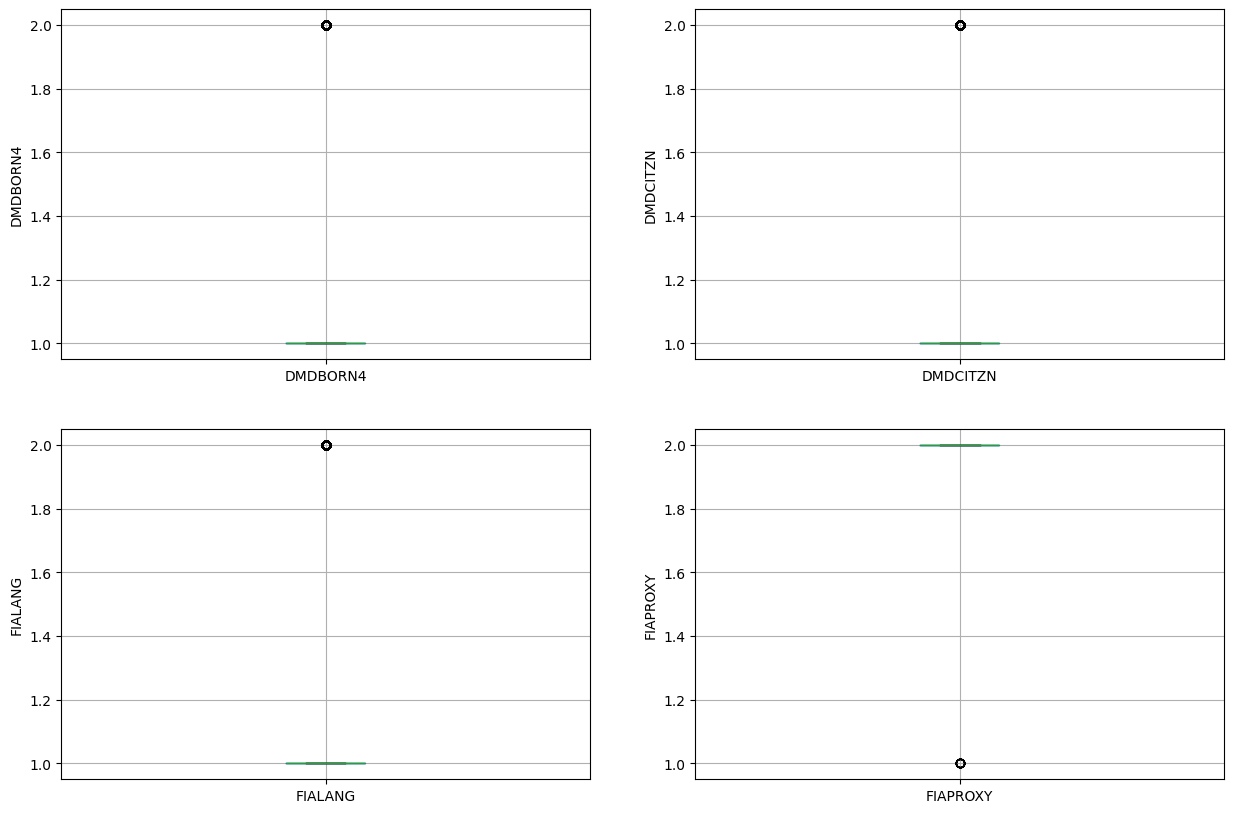

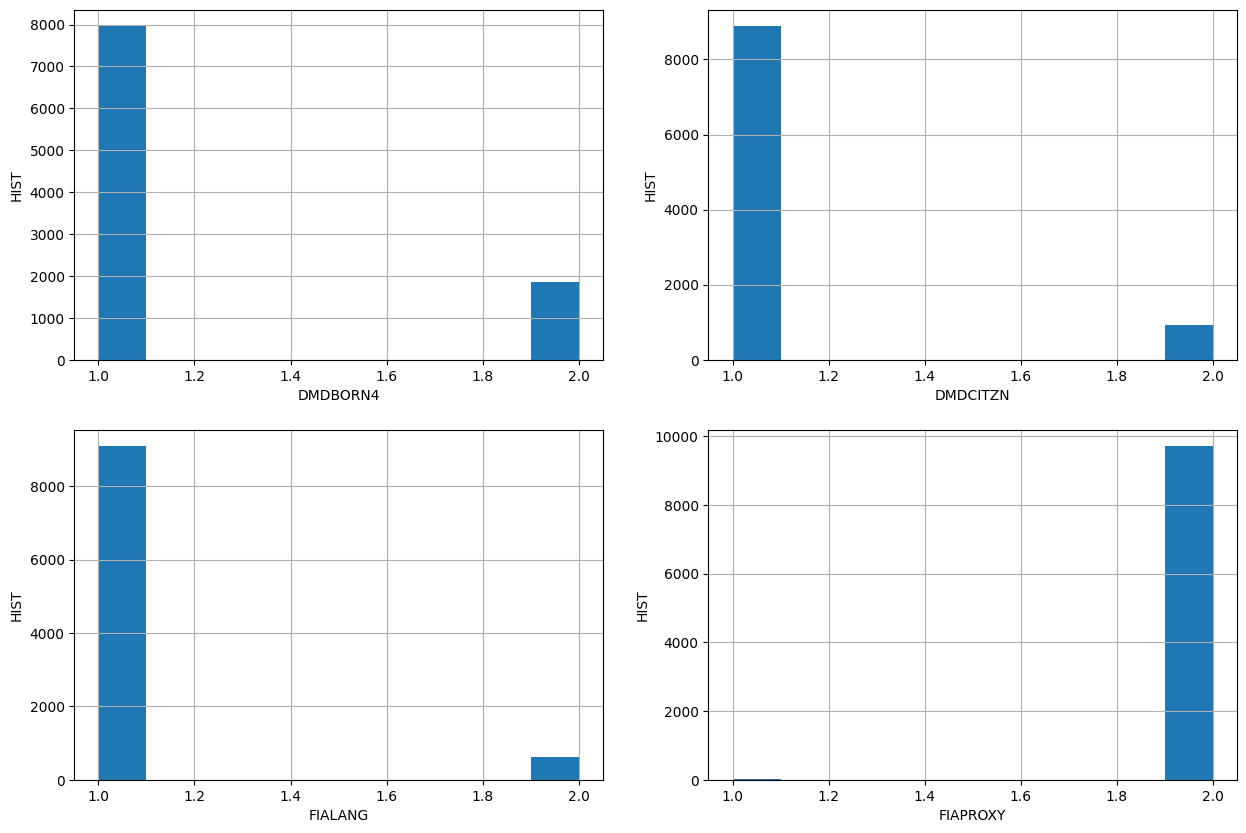

In [1397]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = merged_df.boxplot(column='DMDBORN4')
fig.set_title('')
fig.set_ylabel('DMDBORN4')


plt.subplot(2, 2, 2)
fig = merged_df.boxplot(column='DMDCITZN')
fig.set_title('')
fig.set_ylabel('DMDCITZN')


plt.subplot(2, 2, 3)
fig = merged_df.boxplot(column='FIALANG')
fig.set_title('')
fig.set_ylabel('FIALANG')


plt.subplot(2, 2, 4)
fig = merged_df.boxplot(column='FIAPROXY')
fig.set_title('')
fig.set_ylabel('FIAPROXY')
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = merged_df.DMDBORN4.hist(bins=10)
fig.set_xlabel('DMDBORN4')
fig.set_ylabel('HIST')


plt.subplot(2, 2, 2)
fig = merged_df.DMDCITZN.hist(bins=10)
fig.set_xlabel('DMDCITZN')
fig.set_ylabel('HIST')


plt.subplot(2, 2, 3)
fig = merged_df.FIALANG.hist(bins=10)
fig.set_xlabel('FIALANG')
fig.set_ylabel('HIST')


plt.subplot(2, 2, 4)
fig = merged_df.FIAPROXY.hist(bins=10)
fig.set_xlabel('FIAPROXY')
fig.set_ylabel('HIST')

## Declare feature vector and target variable

In [1398]:
target = pd.read_csv('./content/questionnaire.csv')

Convert combination of 7 and 9 to NaN

In [1399]:
pattern = r'^9+$'
target = target.applymap(replace_with_nan)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18808\101255036.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  target = target.applymap(replace_with_nan)


In [1400]:
pattern = r'^7+$'
target = target.applymap(replace_with_nan)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18808\1210207755.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  target = target.applymap(replace_with_nan)


Doing right join to reach same rows in target and data dfs

In [1401]:
liver_values = target.merge(merged_df, on='SEQN', how='right')[['SEQN', 'MCQ160L']]
cancer_values = target.merge(merged_df, on='SEQN', how='right')[['SEQN', 'MCQ220']]

In [1402]:
target.head()

,SEQN,MCQ160L,MCQ220
0,73557.0,2.0,2.0
1,73558.0,2.0,2.0
2,73559.0,2.0,1.0
3,73560.0,NaN,NaN
4,73561.0,2.0,2.0


In [1403]:
merged_df.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,SIALANG,SIAPROXY,...,LBXHBC,LBDHBG,LBDHD,LBDHEG,LBDHEM,LBXTC,LBDTCSI,LBXTTG,URXVOL1,URDFLOW1
0,73557.0,1,69.0,4,4.0,1.0,1.0,1.0,1,2.0,...,1.0,2.0,2.0,2.0,2.0,167.0,4.32,2.0,87.0,0.821
1,73558.0,1,54.0,3,3.0,1.0,1.0,1.0,1,2.0,...,2.0,2.0,2.0,2.0,2.0,170.0,4.40,2.0,90.0,1.636
2,73559.0,1,72.0,3,3.0,2.0,1.0,1.0,1,2.0,...,2.0,2.0,2.0,2.0,2.0,126.0,3.26,2.0,66.0,NaN
3,73560.0,1,NaN,3,3.0,1.0,1.0,1.0,1,1.0,...,2.0,2.0,2.0,2.0,2.0,168.0,4.34,2.0,61.0,0.575
4,73561.0,2,73.0,3,3.0,1.0,1.0,1.0,1,2.0,...,2.0,2.0,2.0,2.0,2.0,201.0,5.20,2.0,5.0,0.109


In [1404]:
liver_values.head()

,SEQN,MCQ160L
0,73557.0,2.0
1,73558.0,2.0
2,73559.0,2.0
3,73560.0,NaN
4,73561.0,2.0


In [1405]:
cancer_values.head()

,SEQN,MCQ220
0,73557.0,2.0
1,73558.0,2.0
2,73559.0,1.0
3,73560.0,NaN
4,73561.0,2.0


Drop NaN values from target dfs

In [1406]:
cancer_values.dropna(subset=['MCQ220'], inplace=True)
liver_values.dropna(subset=['MCQ160L'], inplace=True)

Doing left join to drop the same rows which were dropped in previous step in data dfs

In [1407]:
final_liver_data = liver_values.merge(merged_df, on='SEQN', how='left').drop(['SEQN', 'MCQ160L'], axis=1)
final_cancer_data = cancer_values.merge(merged_df, on='SEQN', how='left').drop(['SEQN', 'MCQ220'], axis=1)
cancer_values = cancer_values.drop(['SEQN'], axis=1)
liver_values = liver_values.drop(['SEQN'], axis=1)

## Feature Engineering

First, We will display the categorical and numerical variables again separately.

In [1408]:
cancer_categorical = [col for col in final_cancer_data.columns if final_cancer_data[col].dtype == 'object' or (final_cancer_data[col].dtype == 'int64' and final_cancer_data[col].nunique() <= 10)]
print(final_cancer_data[cancer_categorical].head())
liver_categorical = [col for col in final_liver_data.columns if final_liver_data[col].dtype == 'object' or (final_liver_data[col].dtype == 'int64' and final_liver_data[col].nunique() <= 10)]
print(final_liver_data[liver_categorical].head())
cancer_numerical = [col for col in final_cancer_data.columns if final_cancer_data[col].dtype == 'float64' or (final_cancer_data[col].dtype == 'int64' and final_cancer_data[col].nunique() > 10)]
print(final_cancer_data[cancer_numerical].head())
liver_numerical = [col for col in final_liver_data.columns if final_liver_data[col].dtype == 'float64' or (final_liver_data[col].dtype == 'int64' and final_liver_data[col].nunique() > 10)]
print(final_liver_data[liver_numerical].head())

   RIAGENDR  RIDRETH1  SIALANG  SIAINTRP  DMDHHSZA  DMDHHSZB  DMDHHSZE  \
0         1         4        1         2         0         0         2   
1         1         3        1         2         0         2         0   
2         1         3        1         2         0         0         2   
3         2         3        1         2         0         0         2   
4         1         1        1         2         0         0         0   

   DMDHRGND  SDMVPSU  DR1DRSTZ  ...  OHX22CTC  OHX23CTC OHX24CTC OHX25CTC  \
0         1        1         1  ...         P         P        P        P   
1         1        1         1  ...         S         S        S        S   
2         1        1         1  ...         S         Z        S        S   
3         1        2         1  ...         S         Z        R        Z   
4         1        1         1  ...         Y         Y        Y        J   

  OHX26CTC OHX27CTC OHX28CTC OHX29CTC OHX30CTC OHX31CTC  
0        P        P        P      

## Engineering missing values in numerical variables

We will impute missing values with the median.

In [1409]:
for col in cancer_numerical:
    col_median = final_cancer_data[col].median()
    final_cancer_data[col].fillna(col_median, inplace=True)
for col in liver_numerical:
    col_median = final_liver_data[col].median()
    final_liver_data[col].fillna(col_median, inplace=True)
print(final_cancer_data[cancer_numerical].isnull().sum())
print(final_liver_data[liver_numerical].isnull().sum())

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18808\3197492700.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_cancer_data[col].fillna(col_median, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18808\3197492700.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



RIDAGEYR    0
RIDRETH3    0
RIDEXMON    0
DMDBORN4    0
DMDCITZN    0
           ..
LBXTC       0
LBDTCSI     0
LBXTTG      0
URXVOL1     0
URDFLOW1    0
Length: 234, dtype: int64
RIDAGEYR    0
RIDRETH3    0
RIDEXMON    0
DMDBORN4    0
DMDCITZN    0
           ..
LBXTC       0
LBDTCSI     0
LBXTTG      0
URXVOL1     0
URDFLOW1    0
Length: 234, dtype: int64


## Engineering missing values in categorical variables

We will impute missing categorical variables with most frequent value

In [1410]:
for col in cancer_categorical:
    col_mode = final_cancer_data[col].mode()[0]
    final_cancer_data[col].fillna(col_mode, inplace=True)
for col in liver_categorical:
    col_mode = final_liver_data[col].mode()[0]
    final_liver_data[col].fillna(col_mode, inplace=True)
print(final_cancer_data[cancer_categorical].isnull().sum())
print(final_liver_data[liver_categorical].isnull().sum())

RIAGENDR    0
RIDRETH1    0
SIALANG     0
SIAINTRP    0
DMDHHSZA    0
DMDHHSZB    0
DMDHHSZE    0
DMDHRGND    0
SDMVPSU     0
DR1DRSTZ    0
PEASCST1    0
BMDSTATS    0
OHX02CTC    0
OHX03CTC    0
OHX04CTC    0
OHX05CTC    0
OHX06CTC    0
OHX07CTC    0
OHX08CTC    0
OHX09CTC    0
OHX10CTC    0
OHX11CTC    0
OHX12CTC    0
OHX13CTC    0
OHX14CTC    0
OHX15CTC    0
OHX18CTC    0
OHX19CTC    0
OHX20CTC    0
OHX21CTC    0
OHX22CTC    0
OHX23CTC    0
OHX24CTC    0
OHX25CTC    0
OHX26CTC    0
OHX27CTC    0
OHX28CTC    0
OHX29CTC    0
OHX30CTC    0
OHX31CTC    0
dtype: int64
RIAGENDR    0
RIDRETH1    0
SIALANG     0
SIAINTRP    0
DMDHHSZA    0
DMDHHSZB    0
DMDHHSZE    0
DMDHRGND    0
SDMVPSU     0
DR1DRSTZ    0
PEASCST1    0
BMDSTATS    0
OHX02CTC    0
OHX03CTC    0
OHX04CTC    0
OHX05CTC    0
OHX06CTC    0
OHX07CTC    0
OHX08CTC    0
OHX09CTC    0
OHX10CTC    0
OHX11CTC    0
OHX12CTC    0
OHX13CTC    0
OHX14CTC    0
OHX15CTC    0
OHX18CTC    0
OHX19CTC    0
OHX20CTC    0
OHX21CTC    0
OHX22CT

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18808\3527458606.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_cancer_data[col].fillna(col_mode, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18808\3527458606.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

## Dummies the categorical cols
**Cancer Data**

In [1411]:
final_cancer_data = pd.get_dummies(final_cancer_data, columns=cancer_categorical, drop_first=True)

**Liver Data**

In [1412]:
final_liver_data = pd.get_dummies(final_liver_data, columns=liver_categorical, drop_first=True)

## Feature selection

computing correlation coefficient

In [1413]:
cancer_corr_matrix = final_cancer_data.corr()
liver_corr_matrix = final_liver_data.corr()

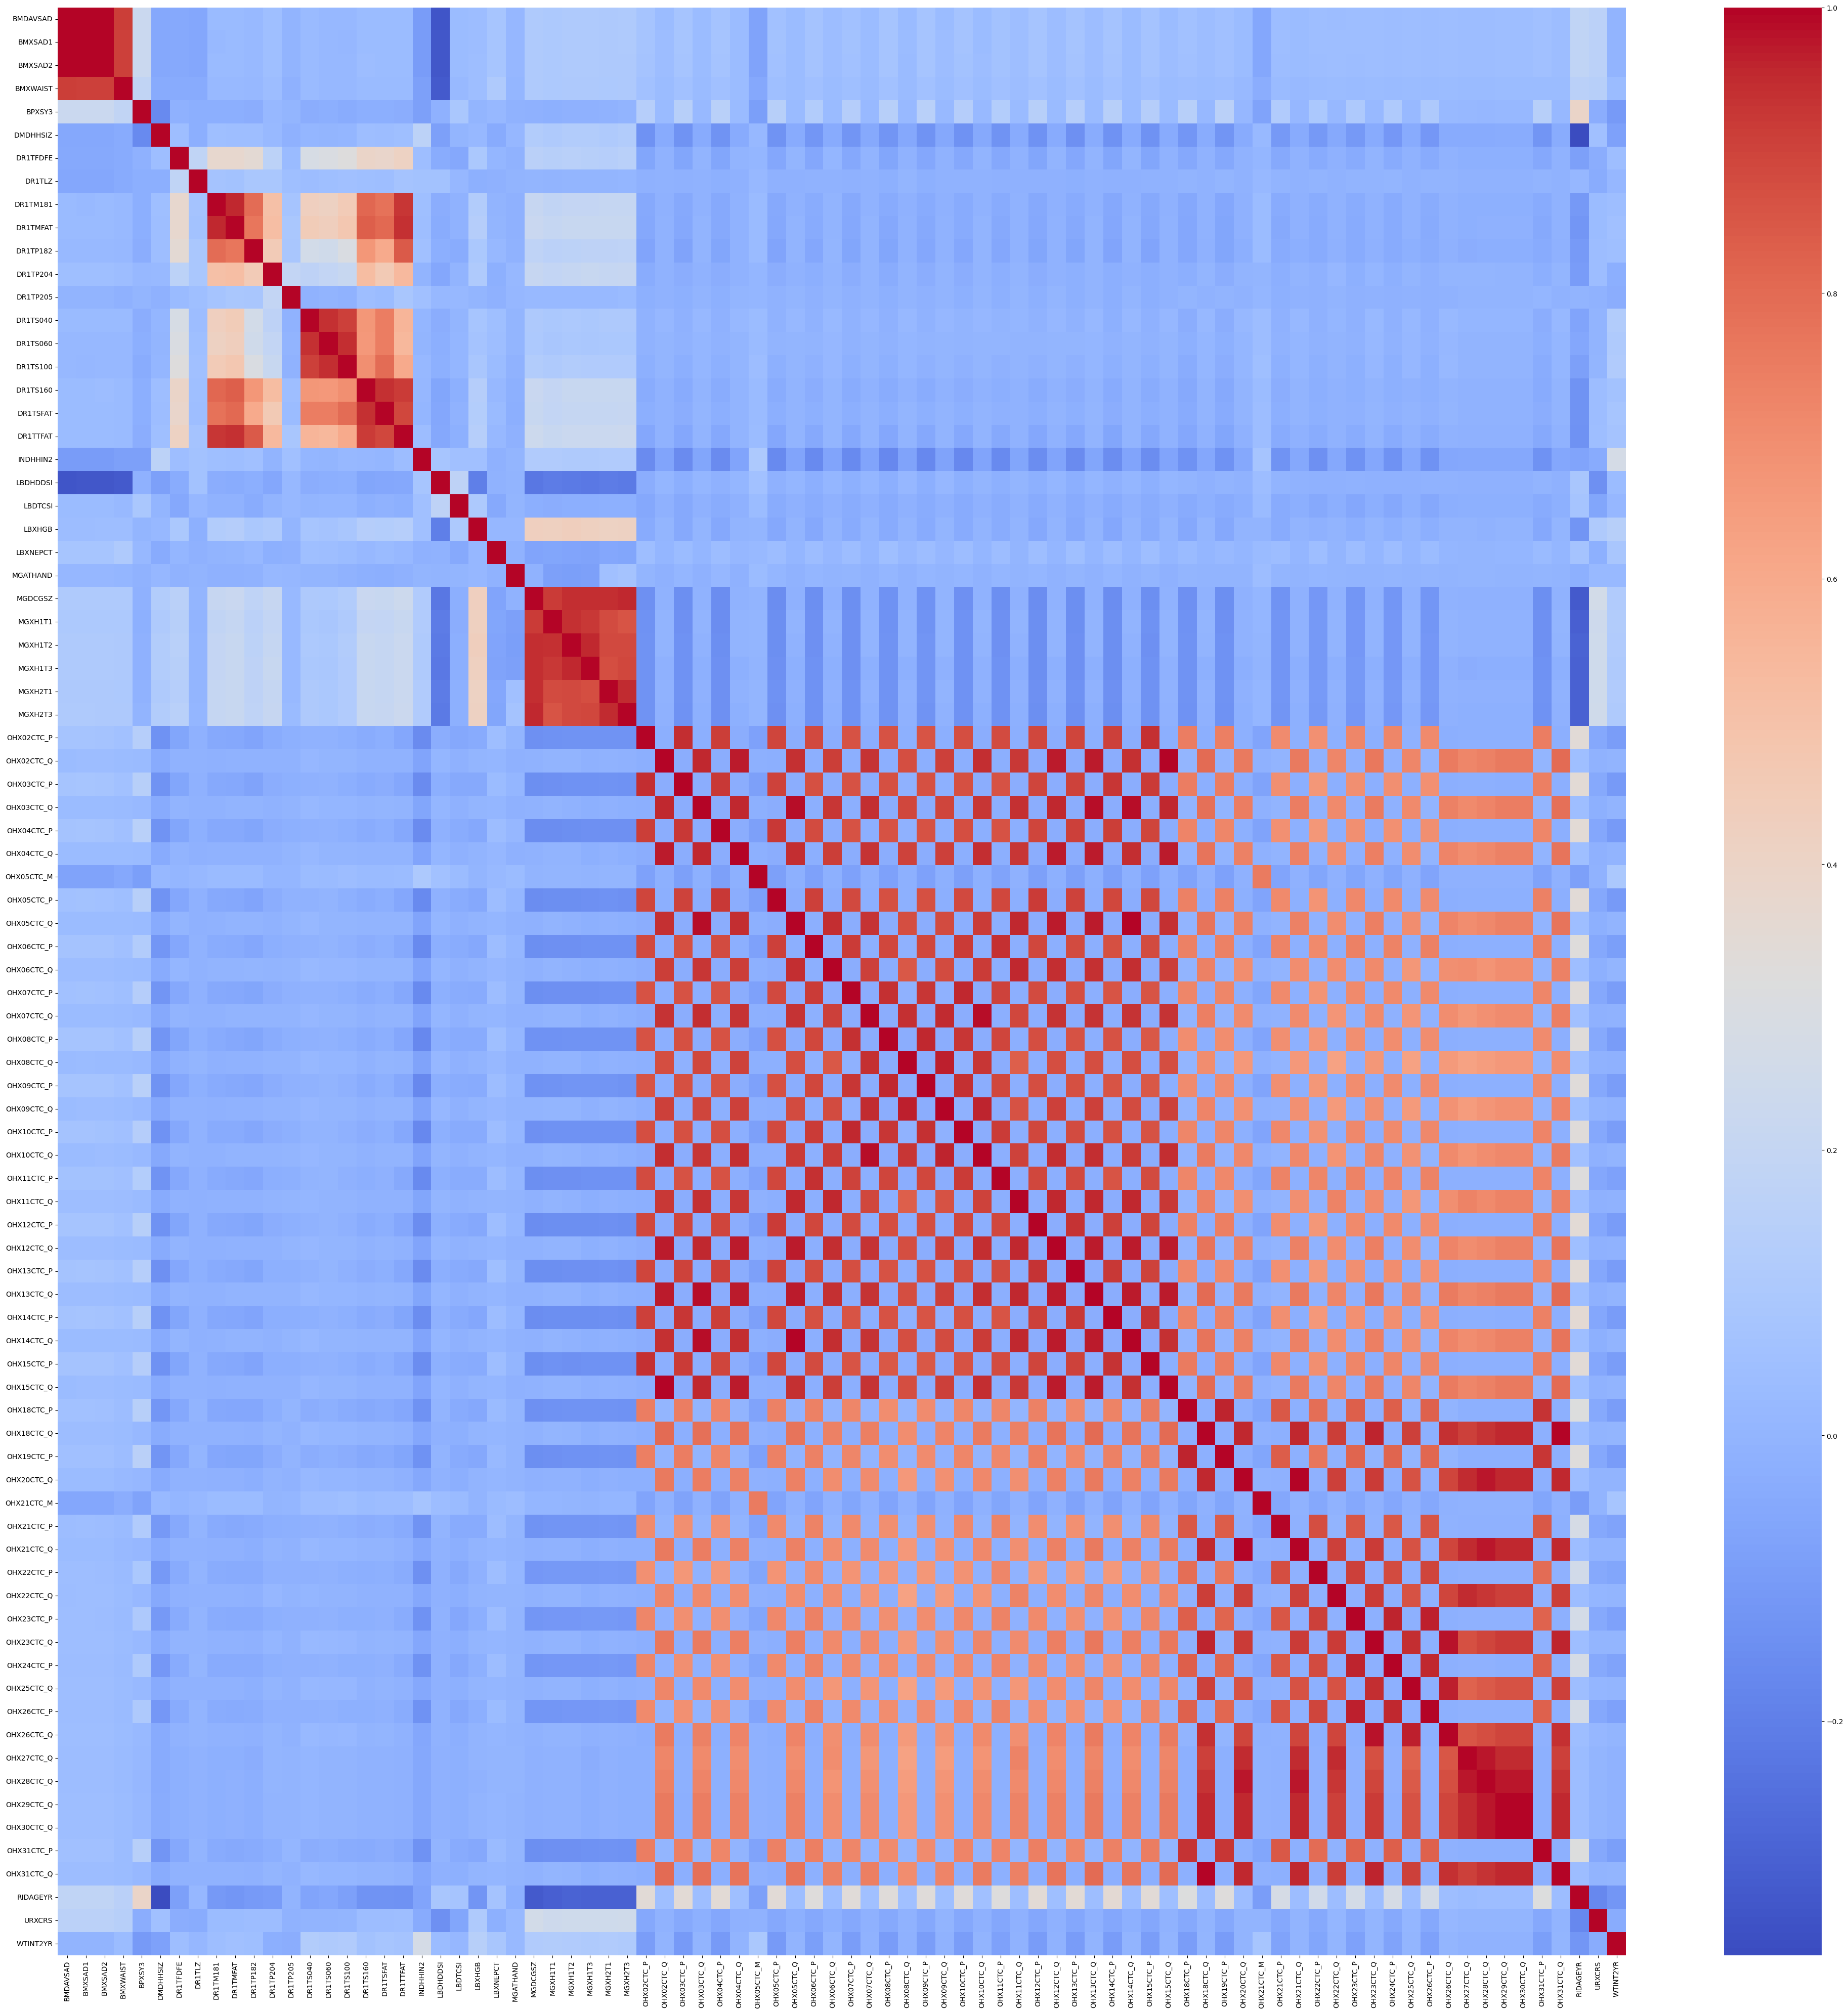

In [1414]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

abs_corr_matrix = np.abs(cancer_corr_matrix)
cancer_corr_pairs = abs_corr_matrix.unstack().sort_values(ascending=False)
top_cancer_pairs = cancer_corr_pairs[:1000]
unique_pairs = top_cancer_pairs.drop_duplicates()
top_columns = np.unique([col for col, _ in unique_pairs.keys()])
top_corr_matrix = final_cancer_data[top_columns].corr()
plt.figure(figsize=(50, 50))
sns.heatmap(top_corr_matrix, annot=False, cmap='coolwarm')
plt.show()

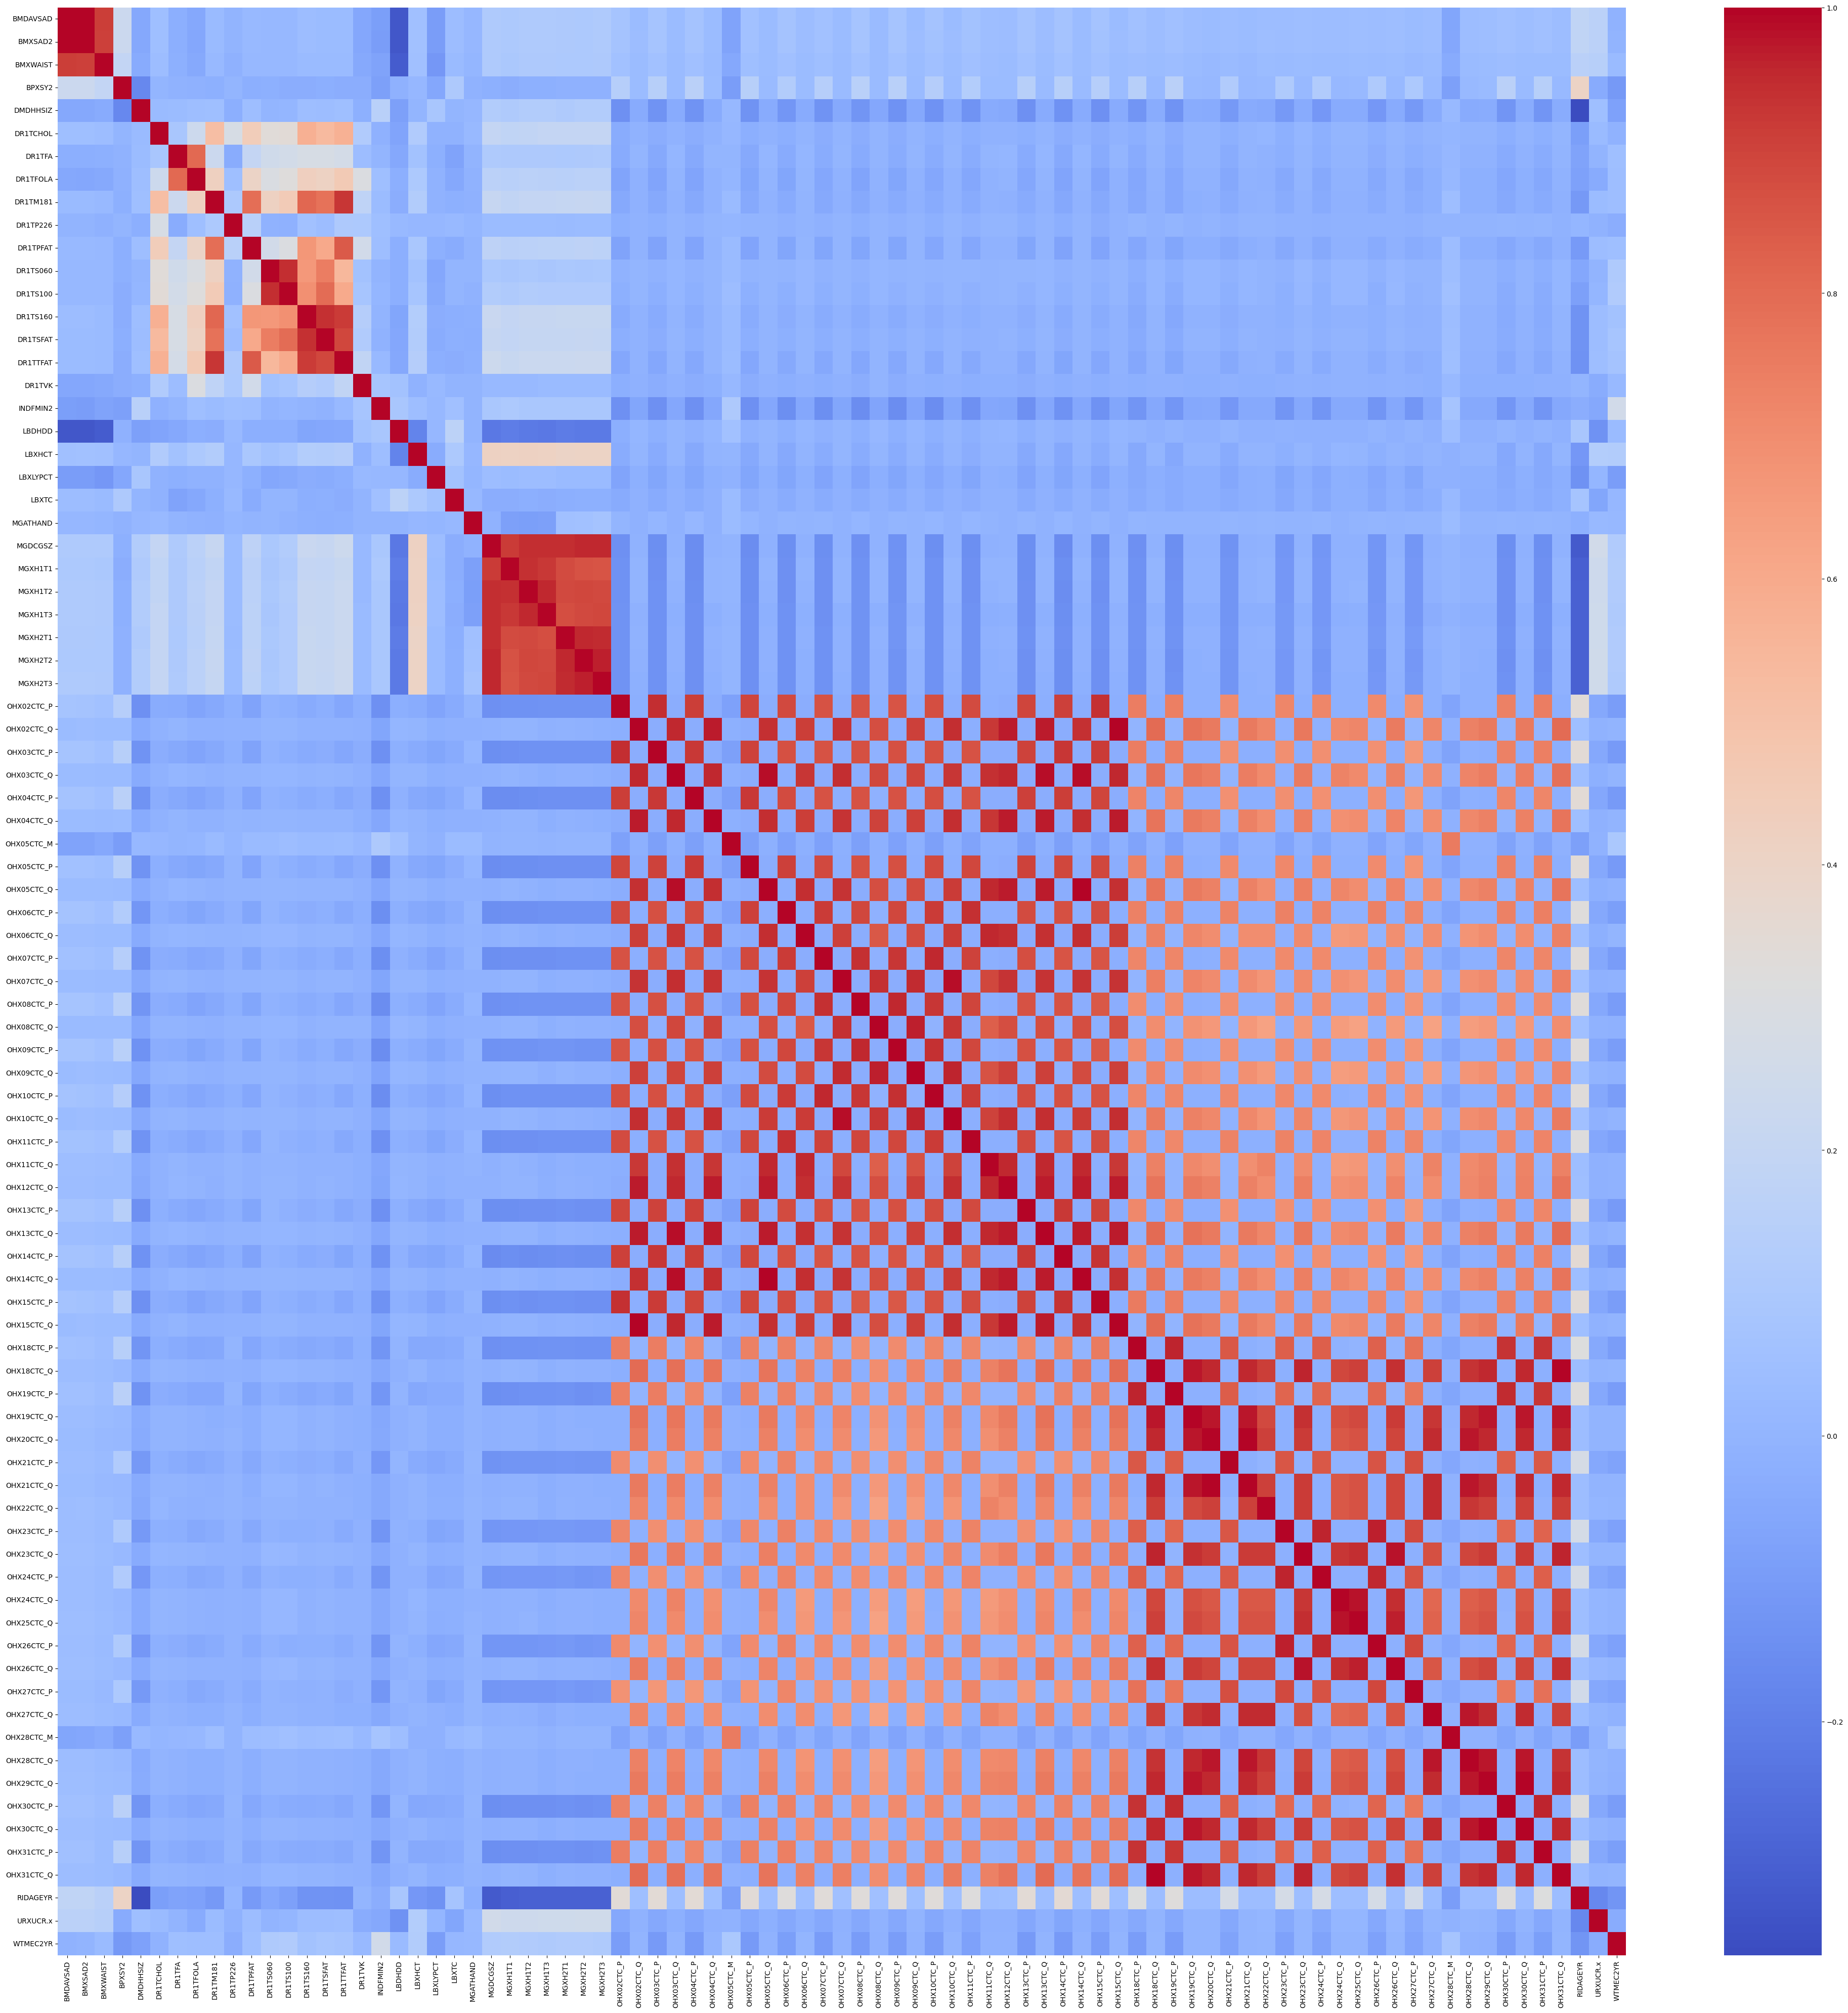

In [1415]:
abs_corr_matrix = np.abs(liver_corr_matrix)
liver_corr_pairs = abs_corr_matrix.unstack().sort_values(ascending=False)
top_liver_pairs = liver_corr_pairs[:1000]
unique_pairs = top_liver_pairs.drop_duplicates()
top_columns = np.unique([col for col, _ in unique_pairs.keys()])
top_corr_matrix = final_liver_data[top_columns].corr()
plt.figure(figsize=(50, 50))
sns.heatmap(top_corr_matrix, annot=False, cmap='coolwarm')
plt.show()

Selecting almost 150 features from original features according to their correlation coefficient

**Cancer**

In [1416]:
import random

# Set your correlation threshold
threshold = 0.5

abs_cancer_corr_matrix = np.abs(cancer_corr_matrix)
# Get pairs with correlation higher than threshold
high_corr_pairs = []
for i in range(len(abs_cancer_corr_matrix.columns)):
    for j in range(i + 1, len(abs_cancer_corr_matrix.columns)):
        corr_val = abs_cancer_corr_matrix.iloc[i, j]
        if corr_val > threshold:
            high_corr_pairs.append(((abs_cancer_corr_matrix.columns[i], abs_cancer_corr_matrix.columns[j]), corr_val))


# Initialize an empty set to hold the selected features
selected_features = set()

# Loop through the high correlation pairs
for pair, corr in high_corr_pairs:
    # Randomly select one feature from the pair
    selected_feature = random.choice(pair)
    # Add the selected feature to the set
    selected_features.add(selected_feature)
    # If we've selected 150 features, stop selecting
    if len(selected_features) == 150:
        break

# If less than 150 features were selected, print a warning
if len(selected_features) < 150:
    print(f"Warning: Only {len(selected_features)} features were selected. Consider lowering the threshold.")

# Create a new DataFrame with only the selected features
selected_cancer_df = final_cancer_data[list(selected_features)]

**Liver**

In [1417]:
# Set your correlation threshold
threshold = 0.65

abs_liver_corr_matrix = np.abs(liver_corr_matrix)
# Get pairs with correlation higher than threshold
high_corr_pairs = []
for i in range(len(abs_liver_corr_matrix.columns)):
    for j in range(i + 1, len(abs_liver_corr_matrix.columns)):
        corr_val = abs_liver_corr_matrix.iloc[i, j]
        if corr_val > threshold:
            high_corr_pairs.append(((abs_liver_corr_matrix.columns[i], abs_liver_corr_matrix.columns[j]), corr_val))

# Initialize an empty set to hold the selected features
selected_features = set()

# Loop through the high correlation pairs
for pair, corr in high_corr_pairs:
    # Randomly select one feature from the pair
    selected_feature = random.choice(pair)
    # Add the selected feature to the set
    selected_features.add(selected_feature)
    # If we've selected 150 features, stop selecting
    if len(selected_features) == 150:
        break

# If less than 150 features were selected, print a warning
if len(selected_features) < 150:
    print(f"Warning: Only {len(selected_features)} features were selected. Consider lowering the threshold.")

# Create a new DataFrame with only the selected features
selected_liver_df = final_liver_data[list(selected_features)]

In [1418]:
print(selected_cancer_df.head())
print(selected_liver_df.head())

   DR1TFOLA  INDFMIN2  OHX15CTC_P  DR1HELPD  MIALANG  OHX09CTC_P  OHX02CTC_Z  \
0     285.0       4.0        True      13.0      1.0        True       False   
1    1243.0       6.0       False      13.0      1.0       False        True   
2     423.0      10.0       False      13.0      1.0       False        True   
3     390.0      15.0       False      13.0      1.0       False       False   
4     458.0       6.0       False      13.0      1.0       False        True   

   OHX13TC  OHX18CTC_P  DR1TMFAT  ...  OHX14CTC_P  DMDBORN4  DR1TM181  \
0      4.0        True    18.493  ...        True       1.0    16.796   
1      2.0       False    35.481  ...       False       1.0    32.429   
2      2.0       False    20.902  ...       False       1.0    19.910   
3      2.0       False    26.216  ...       False       1.0    22.673   
4      4.0       False    40.013  ...       False       1.0    37.405   

   BMXSAD1  DR1TFF  DR1TMAGN  DR1TS100  DR1TACAR  OHX11TC  BMDAVSAD  
0     20.5

## Scale and PCA
We will use zero-mean scaler to normalize the data

In [1419]:
from sklearn.preprocessing import StandardScaler

cols = selected_liver_df.columns
scaler = StandardScaler()

selected_liver_df = scaler.fit_transform(selected_liver_df)
selected_liver_df = pd.DataFrame(selected_liver_df, columns=[cols])

cols = selected_cancer_df.columns
scaler = StandardScaler()

selected_cancer_df = scaler.fit_transform(selected_cancer_df)
selected_cancer_df = pd.DataFrame(selected_cancer_df, columns=[cols])

In [1420]:
from sklearn.decomposition import PCA

pca = PCA(0.90)
cancerprincipalComponents = pca.fit_transform(selected_cancer_df)

cancerprincipalDf = pd.DataFrame(data=cancerprincipalComponents,
                           columns=['Principal Component ' + str(i) for i in range(1, cancerprincipalComponents.shape[1] + 1)])
cancerprincipalDf.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 45,Principal Component 46,Principal Component 47,Principal Component 48,Principal Component 49,Principal Component 50,Principal Component 51,Principal Component 52,Principal Component 53,Principal Component 54
0,14.325506,5.149133,0.368545,-2.114249,0.858478,-0.422952,0.295632,-2.155158,-0.767819,-0.712645,...,0.101054,0.067601,-0.078943,0.068839,-0.026584,-0.652337,-0.198968,0.124350,-0.478002,0.690051
1,-10.034239,15.291912,-2.953936,3.015099,-4.948297,1.110769,4.990904,3.396977,9.430847,0.759773,...,-1.912759,0.262887,1.664991,1.450477,0.293023,0.758688,3.160514,-0.465535,-0.312382,-0.002170
2,-1.955087,-2.134685,3.754774,-0.379629,1.450568,0.957196,-1.785945,1.191149,0.699208,2.218243,...,-0.298479,0.561399,0.392185,-0.727678,-0.467600,0.889722,0.445964,-1.027602,-0.035097,0.308341
3,3.513202,-1.295431,-3.725120,1.391073,0.398483,4.708307,-0.750887,5.210772,1.590216,-1.050703,...,-1.168381,2.555003,-0.466476,0.117187,3.064079,1.424593,1.456530,0.301782,0.245972,-0.105738
4,1.915054,0.473546,2.169461,5.426292,-2.433263,1.107551,0.986918,3.114374,-1.592341,0.742671,...,-0.166178,-1.554532,-0.242621,-1.159341,0.759345,1.103568,-0.532536,-0.905240,-0.158520,0.554337


In [1421]:
pca = PCA(0.90)
liverprincipalComponents = pca.fit_transform(selected_liver_df)

liverprincipalDf = pd.DataFrame(data=liverprincipalComponents,
                           columns=['Principal Component ' + str(i) for i in range(1, liverprincipalComponents.shape[1] + 1)])
liverprincipalDf.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 40,Principal Component 41,Principal Component 42,Principal Component 43,Principal Component 44,Principal Component 45,Principal Component 46,Principal Component 47,Principal Component 48,Principal Component 49
0,19.886528,0.271277,0.811231,-2.104084,0.572049,0.128364,-2.015718,0.743420,-1.564071,0.357135,...,-0.407914,-0.355557,-0.165146,0.919716,-0.657526,0.654399,0.116916,0.705583,0.213660,-0.420489
1,-4.672870,16.750758,-4.466325,3.660312,-7.865611,-2.013071,1.677970,5.751861,4.277245,-6.227688,...,-1.173055,-0.887259,-0.318367,-1.207006,-1.041071,-0.214395,-1.341363,-2.223195,1.337522,-0.279987
2,-2.376243,-0.626231,4.303748,-1.467166,1.636387,-0.170611,-0.422331,-1.382628,1.148310,-1.698009,...,-0.221269,1.051164,0.861616,0.854951,-0.380605,0.055109,0.499035,-0.397633,0.448766,-0.014542
3,2.173029,-4.106252,-3.331925,0.697349,-0.995164,-3.384175,0.419461,-3.290384,4.526514,-1.266990,...,-0.771074,0.476765,-0.385861,1.830852,-0.199434,-0.404248,0.876004,1.044830,0.035534,2.128866
4,2.260112,-0.061256,2.460433,4.516250,-1.615619,-5.356336,0.453466,-1.500313,1.214605,0.536795,...,0.479354,0.827126,1.548534,0.606607,0.134599,-1.699654,-0.005293,1.521066,-0.380841,-0.632862


**Convert model labels to 0 and 1**

In [1422]:
cancer_values['MCQ220'] = cancer_values['MCQ220'].apply(lambda x: 1 if x == 1 else 0)
cancer_values.head()

,MCQ220
0,0
1,0
2,1
4,0
5,0


In [1423]:
liver_values['MCQ160L'] = liver_values['MCQ160L'].apply(lambda x: 1 if x == 1 else 0)
liver_values.head()

,MCQ160L
0,0
1,0
2,0
4,0
5,0


## Train Test Split

In [1424]:
from sklearn.model_selection import train_test_split

cancer_x_train, cancer_x_test, cancer_y_train, cancer_y_test = train_test_split(cancerprincipalDf, cancer_values, test_size = 0.2, random_state = 0)
liver_x_train, liver_x_test, liver_y_train, liver_y_test = train_test_split(liverprincipalDf, liver_values, test_size = 0.2, random_state = 0)
cancer_x_train.shape, cancer_x_test.shape, liver_x_train.shape, liver_x_test.shape

((4470, 54), (1118, 54), (4463, 49), (1116, 49))

Because the dataset is imbalance, so we use the sampling techniques

In [1425]:
from imblearn.under_sampling import RandomUnderSampler

# Under-sampling for liver dataset
rus = RandomUnderSampler(random_state=0)
liver_x_resampled, liver_y_resampled = rus.fit_resample(liver_x_train, liver_y_train)

# Under-sampling for cancer dataset
rus = RandomUnderSampler(random_state=0)
cancer_x_resampled, cancer_y_resampled = rus.fit_resample(cancer_x_train, cancer_y_train)

In [732]:
cancer_x_resampled_df = pd.DataFrame(cancer_x_resampled)
cancer_y_resampled_df = pd.DataFrame(cancer_y_resampled)
cancer_x_test_df = pd.DataFrame(cancer_x_test)
cancer_y_test_df = pd.DataFrame(cancer_y_test)

cancer_x_resampled_df.to_csv('cancer_x_resampled.csv', index=False)
cancer_y_resampled_df.to_csv('cancer_y_resampled.csv', index=False)
cancer_x_test_df.to_csv('cancer_x_test.csv', index=False)
cancer_y_test_df.to_csv('cancer_y_test.csv', index=False)


Epoch 10/100, Train Loss: 0.6576, Train Acc: 0.6997, Val Loss: 0.6444, Val Acc: 0.7531
Epoch 20/100, Train Loss: 0.5453, Train Acc: 0.7508, Val Loss: 0.5414, Val Acc: 0.7469
Epoch 30/100, Train Loss: 0.5093, Train Acc: 0.7601, Val Loss: 0.5356, Val Acc: 0.7407
Epoch 40/100, Train Loss: 0.4912, Train Acc: 0.7585, Val Loss: 0.5487, Val Acc: 0.7407
Epoch 50/100, Train Loss: 0.4825, Train Acc: 0.7786, Val Loss: 0.5652, Val Acc: 0.7222
Epoch 60/100, Train Loss: 0.4721, Train Acc: 0.7879, Val Loss: 0.5719, Val Acc: 0.7284
Epoch 70/100, Train Loss: 0.4646, Train Acc: 0.7972, Val Loss: 0.5866, Val Acc: 0.7160
Epoch 80/100, Train Loss: 0.4547, Train Acc: 0.7910, Val Loss: 0.5820, Val Acc: 0.7346
Epoch 90/100, Train Loss: 0.4465, Train Acc: 0.7941, Val Loss: 0.5979, Val Acc: 0.7222
Epoch 100/100, Train Loss: 0.4380, Train Acc: 0.8142, Val Loss: 0.6193, Val Acc: 0.6975


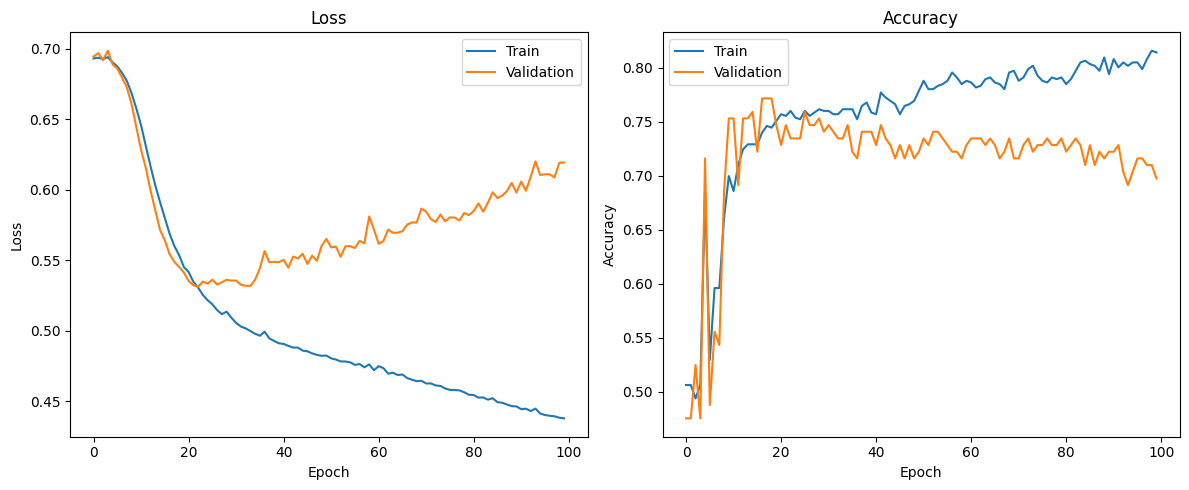

Test Loss: 0.5608, Test Accuracy: 0.6950

Example predictions:
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0


In [1439]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class DataPreprocessor:
    def __init__(self):
        '''
        initiate X and y with resampled values
        initiate X_test and y_test with test values
        '''
        self.X = cancer_x_resampled.values
        self.y = cancer_y_resampled.values
        self.X_test = cancer_x_test.values
        self.y_test = cancer_y_test.values

    def preprocess(self):
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42)

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        '''
        Initiate weights with random normal numbers. with mean=0 and std=0.01. you need 2 weight matrices.
        from input2hidden and from hidden2output.
        Initiate biase vectors with zeros.
        '''
        self.weights1 = np.random.normal(0, 0.01, (input_size, hidden_size))
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.normal(0, 0.01, (hidden_size, output_size))
        self.bias2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        '''
        Implement the sigmoid function.
        '''
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        '''
        Implement the derivative of sigmoid function.
        '''
        return x * (1 - x)

    def forward(self, X):
        '''
        Do the forward phase. In this phase first propagate inputs through weights and sum up with biases.
        Then pass the results through activation function.
        '''
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output, learning_rate):
        '''
        steps:
        1. The error term for the output layer: calculated as the difference between the predicted output and the true labels (dz2).
        2. Gradients for Output Layer Weights and Biases: gradient of the loss with respect to the weights and biases of the output layer (dw2, db2).
        3. Hidden layer error calculation: calculated by propagating the error back through the weights of the output layer
                                           and applying the derivative of the activation function (dz1).
        4. Gradients for Hidden Layer Weights and Biases: gradient of the loss with respect to the weights and biases of the hidden layer (dw1, db1).
        5. Updating Weights and Biases.
        '''
        m = X.shape[0]

        dz2 = output - y
        dw2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        dz1 = np.dot(dz2, self.weights2.T) * self.sigmoid_derivative(self.a1)
        dw1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        self.weights2 -= learning_rate * dw2
        self.bias2 -= learning_rate * db2
        self.weights1 -= learning_rate * dw1
        self.bias1 -= learning_rate * db1


class Trainer:
    def __init__(self, model, X_train, y_train, X_val, y_val, epochs=100, learning_rate=0.1, batch_size=32):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.train_losses = []
        self.train_accuracies = []
        self.val_losses = []
        self.val_accuracies = []

    def train(self):
        m = self.X_train.shape[0]

        for epoch in range(self.epochs):
            # Shuffle the training data
            indices = np.random.permutation(m)
            X_shuffled = self.X_train[indices]
            y_shuffled = self.y_train[indices]

            for i in range(0, m, self.batch_size):
                ## get the current batch data and calculate the model output. Then update the weights and biases.
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                output = self.model.forward(X_batch)
                self.model.backward(X_batch, y_batch, output, self.learning_rate)

            # Calculate train loss (BinaryCrossEntropy) and accuracy (over 0.5 is 1 else is 0)
            train_output = self.model.forward(self.X_train)
            train_loss = -np.mean(self.y_train * np.log(train_output + 1e-10) + (1 - self.y_train) * np.log(1 - train_output + 1e-10))
            train_accuracy = np.mean(np.where((train_output > 0.5) == self.y_train, 1, 0))

            # Calculate validation loss and accuracy
            val_output = self.model.forward(self.X_val)
            val_loss = -np.mean(self.y_val * np.log(val_output + 1e-10) + (1 - self.y_val) * np.log(1 - val_output + 1e-10))
            val_accuracy = np.mean(np.where((val_output > 0.5) == self.y_val, 1, 0))

            self.train_losses.append(train_loss)
            self.train_accuracies.append(train_accuracy)
            self.val_losses.append(val_loss)
            self.val_accuracies.append(val_accuracy)

            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}/{self.epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    def plot_results(self):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(self.train_losses, label='Train')
        plt.plot(self.val_losses, label='Validation')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.train_accuracies, label='Train')
        plt.plot(self.val_accuracies, label='Validation')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

class Tester:
    def __init__(self, model, X_test, y_test):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test

    def test(self):
        '''
        first forward the test data in the trained model
        then compute the BCE
        then binary acc.
        '''
        test_output = self.model.forward(self.X_test)
        test_loss = -np.mean(self.y_test * np.log(test_output + 1e-10) + (1 - self.y_test) * np.log(1 - test_output + 1e-10))
        test_accuracy = np.mean(np.where((test_output > 0.5) == self.y_test, 1, 0))

        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

        return test_output
    
# Main execution
if __name__ == "__main__":
    # Preprocess data
    preprocessor = DataPreprocessor()
    preprocessor.preprocess()

    # Initialize and train model
    input_size = preprocessor.X_train.shape[1]
    hidden_size = 10
    output_size = 1

    model = MLP(input_size, hidden_size, output_size)
    trainer = Trainer(model, preprocessor.X_train, preprocessor.y_train,
                      preprocessor.X_val, preprocessor.y_val,
                      epochs=100, learning_rate=0.1, batch_size=32)
    trainer.train()

    # Plot results
    trainer.plot_results()

    # Test the model
    tester = Tester(model, preprocessor.X_test, preprocessor.y_test)
    test_output = tester.test()

    # Print some example predictions
    print("\nExample predictions:")
    for i in range(5):
        true_label = np.argmax(preprocessor.y_test[i])
        predicted_label = np.argmax(test_output[i])
        print(f"True: {true_label}, Predicted: {predicted_label}")